# Movie Streaming Platform Visualisation 
 

### Introduction: 
Our project 'Movie Streaming Platform Visualization' considers 4 major streaming platforms Netflix, Hulu, Disney+ and Amazon Prime are compared to find which one is better in various departments. We have analyzed a dataset from Kaggle that has information of various movies available on these 4 streaming platforms. 

### Data Description: 
Our dataset is https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney. 
It consists of Movie name (Title), 4 Streaming platforms (if a movie is available in a certain platform that column has 1 or else 0), Release Year, Age Group, IMDB Rating, Rotten Tomato Rating, Movie Director, Genre, Country Availability, Movie Language and Runtime.

### Importing required Packages

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer    
from nltk.tokenize import RegexpTokenizer
from sklearn import preprocessing
from scipy.sparse import hstack

### Reading dataset

In [187]:
df = pd.read_csv('MoviesOnStreamingPlatforms_updated.csv')
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


### Data Preprocessing

In [188]:
df = df.drop(['Unnamed: 0'], axis=1)

In [189]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9515 non-null   int64  
 1   Title            9515 non-null   object 
 2   Year             9515 non-null   int64  
 3   Age              5338 non-null   object 
 4   IMDb             9309 non-null   object 
 5   Rotten Tomatoes  9508 non-null   object 
 6   Netflix          9515 non-null   int64  
 7   Hulu             9515 non-null   int64  
 8   Prime Video      9515 non-null   int64  
 9   Disney+          9515 non-null   int64  
 10  Type             9515 non-null   int64  
 11  Directors        9104 non-null   object 
 12  Genres           9399 non-null   object 
 13  Country          9261 non-null   object 
 14  Language         9202 non-null   object 
 15  Runtime          9196 non-null   float64
dtypes: float64(1), int64(7), object(8)
memory usage: 1.2+ MB


In [190]:
# calculating the missing values percentage.
# if column has more than 50% missing value drop that column.
# drop the rows containing missing values.

In [191]:
miss = pd.DataFrame(df.isnull().sum())

miss = miss.rename(columns={0: "miss_count"})
miss['miss_%'] = miss.miss_count/len(df.ID)*100
miss['miss_%'] = miss['miss_%'].round(2)
miss

,miss_count,miss_%
ID,0,0.00
Title,0,0.00
Year,0,0.00
Age,4177,43.90
IMDb,206,2.17
Rotten Tomatoes,7,0.07
Netflix,0,0.00
Hulu,0,0.00
Prime Video,0,0.00
Disney+,0,0.00


In [192]:
df.dropna(subset=['Age', 'IMDb','Rotten Tomatoes','Directors','Genres', 'Country', 'Language', 'Runtime'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.Year = df.Year.astype("object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5080 entries, 0 to 5079
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               5080 non-null   int64  
 1   Title            5080 non-null   object 
 2   Year             5080 non-null   object 
 3   Age              5080 non-null   object 
 4   IMDb             5080 non-null   object 
 5   Rotten Tomatoes  5080 non-null   object 
 6   Netflix          5080 non-null   int64  
 7   Hulu             5080 non-null   int64  
 8   Prime Video      5080 non-null   int64  
 9   Disney+          5080 non-null   int64  
 10  Type             5080 non-null   int64  
 11  Directors        5080 non-null   object 
 12  Genres           5080 non-null   object 
 13  Country          5080 non-null   object 
 14  Language         5080 non-null   object 
 15  Runtime          5080 non-null   float64
dtypes: float64(1), int64(6), object(9)
memory usage: 635.1+ KB


In [193]:
## converting IMDB and Rotten Tomatoes columns to integer for analysis

In [194]:
df['IMDb'] = df['IMDb'].str[0:3:2] #slice of s from i to j with step k
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str[:2]
df

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,18+,78,98,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,7+,84,97,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,7+,90,95,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,7+,81,94,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,6,To All the Boys I've Loved Before,2018,13+,71,94,1,0,0,0,0,Susan Johnson,"Comedy,Drama,Romance",United States,English,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5075,9460,Big Sur-Wild California,2010,all,67,40,0,0,0,1,0,Sue Houghton,"Documentary,History",United States,English,50.0
5076,9463,Justin Morgan Had a Horse,1972,all,65,39,0,0,0,1,0,Hollingsworth Morse,"Family,Drama,Western",United States,English,91.0
5077,9465,Richie Rich's Christmas Wish,1998,all,41,39,0,0,0,1,0,John Murlowski,"Comedy,Family",United States,English,84.0
5078,9495,Sultan And The Rock Star,1980,all,56,34,0,0,0,1,0,Edward M. Abroms,"Adventure,Drama,Family",United States,English,60.0


In [195]:
df.IMDb = df.IMDb.astype("int64")
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5080 entries, 0 to 5079
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               5080 non-null   int64  
 1   Title            5080 non-null   object 
 2   Year             5080 non-null   object 
 3   Age              5080 non-null   object 
 4   IMDb             5080 non-null   int64  
 5   Rotten Tomatoes  5080 non-null   int64  
 6   Netflix          5080 non-null   int64  
 7   Hulu             5080 non-null   int64  
 8   Prime Video      5080 non-null   int64  
 9   Disney+          5080 non-null   int64  
 10  Type             5080 non-null   int64  
 11  Directors        5080 non-null   object 
 12  Genres           5080 non-null   object 
 13  Country          5080 non-null   object 
 14  Language         5080 non-null   object 
 15  Runtime          5080 non-null   float64
dtypes: float64(1), int64(8), object(7)
memory usage: 635.1+ KB


In [196]:
## Visualizing the spread of data Year-wise

<Figure size 1440x216 with 0 Axes>

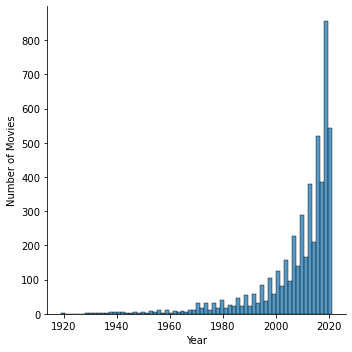

In [225]:
plt.figure(figsize=(20,3))
sns.displot(df['Year'])
plt.xticks()
plt.ylabel("Number of Movies")
plt.show()

In [198]:
## Visualizing the spread of data by IMDB ratings

<Figure size 1440x216 with 0 Axes>

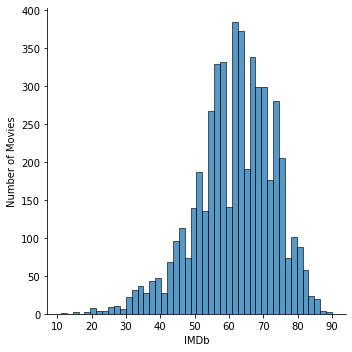

In [226]:
plt.figure(figsize=(20,3))
sns.displot(df['IMDb'])
plt.ylabel("Number of Movies")
plt.show()

### Movies available in each country by streaming service.

In [200]:

df['Country']=df['Country'].str.split(',')
df2=pd.DataFrame(list(set(itertools.chain.from_iterable(df.Country))),columns=['Country'])


In [201]:
Netflix_count=[]
Hulu_count=[]
Disney_count=[]
Prime_count=[]
for country in df2['Country']:
    n_count=0
    p_count=0
    d_count=0
    h_count=0
    for index, row in df.iterrows():
        if country in row['Country'] and row['Netflix']==1:
            n_count=n_count+row['Netflix']  
        if country in row['Country'] and row['Hulu']==1:
            h_count=h_count+row['Hulu']
        if country in row['Country'] and row['Disney+']==1:
            d_count=d_count+row['Disney+']
        if country in row['Country'] and row['Prime Video']==1:
            p_count=p_count+row['Prime Video']
    Netflix_count.append(n_count)
    Hulu_count.append(h_count)
    Disney_count.append(d_count)
    Prime_count.append(p_count)

df2['Netflix']=Netflix_count
df2['Hulu']=Hulu_count
df2['Disney']=Disney_count
df2['Prime']=Prime_count

In [202]:
df2['total']=df2['Netflix']+df2['Prime']+df2['Disney']+df2['Hulu']

In [203]:
df2=df2.sort_values(by='total', ascending=False)



In [204]:
#1. Movies available in each country by each streaming service. top 6

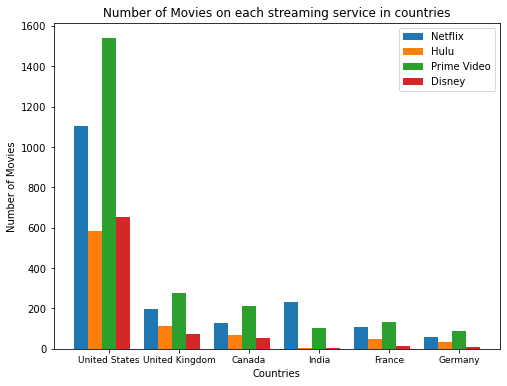

In [205]:
X = df2['Country'].head(6)
Netflix= df2['Netflix'].head(6)
Hulu = df2['Hulu'].head(6)
Prime = df2['Prime'].head(6)
Disney = df2['Disney'].head(6)


 
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.4, Netflix, 0.2, label = 'Netflix')
plt.bar(X_axis - 0.2, Hulu, 0.2, label = 'Hulu')
plt.bar(X_axis + 0.0, Prime, 0.2, label = 'Prime Video')
plt.bar(X_axis + 0.2, Disney, 0.2, label = 'Disney')



  
plt.xticks(X_axis, X,fontsize=9)
plt.xlabel("Countries")
plt.ylabel("Number of Movies")
plt.title("Number of Movies on each streaming service in countries")
plt.legend()
plt.show()

In [206]:
platform = ['Prime Video','Netflix', 'Hulu', 'Disney+']
platform_imdb=[]

for i in platform:
    platformstream=df[(df[i] == 1)]
    platform_imdb.append(int(platformstream['IMDb'].mode()))
    


In [207]:
#2. Statistics of IMDB ratings of the movies available in each streaming platform.

Prime Video has IMDb rating mode of 6.2
Netflix has IMDb rating mode of 6.5
Hulu has IMDb rating mode of 6.2
Disney+ has IMDb rating mode of 7.3


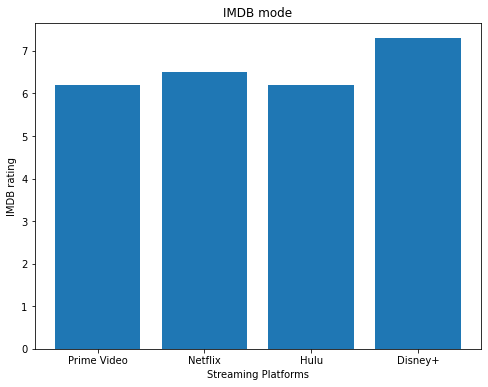

In [208]:
df_platforms=pd.DataFrame(platform, columns=['Platforms'])
df_platforms['IMDB']=platform_imdb
plt.bar(df_platforms.Platforms, df_platforms.IMDB/10, tick_label = platform,
        width = 0.8)
for val,p in zip(platform_imdb,platform):
    print(f'{p} has IMDb rating mode of {val/10}')

plt.xlabel('Streaming Platforms')
plt.ylabel('IMDB rating')
plt.title('IMDB mode')
plt.show()

In [209]:
#3.In what all languages movies are provided by each streaming platform

In [210]:
lang = df['Language'].str.split(',').apply(pd.Series, 1).stack()
lang.index = lang.index.droplevel(-1)
lang.name = 'Language'
del df['Language']
df_language = df.join(lang)


In [211]:
platform = ['Prime Video','Netflix', 'Hulu', 'Disney+']
language_unique=df_language.Language.unique()
dict_language_count={}
for language in language_unique:
    count_list=[]
    for p in platform:
        df_boolean=df_language.apply(lambda x : True
            if x['Language'] == language and x[p]==1  else False, axis = 1)
        count_list.append(len(df_boolean[df_boolean == True].index))
    dict_language_count[language]=np.array(count_list)    

In [212]:
dict_platform={}
platform = ['Prime Video','Netflix', 'Hulu', 'Disney+']
for i in range(0,4):
    language_count=[]
    for key,value in dict_language_count.items(): 
        language_count.append(value[i])
    dict_platform[platform[i]]=language_count

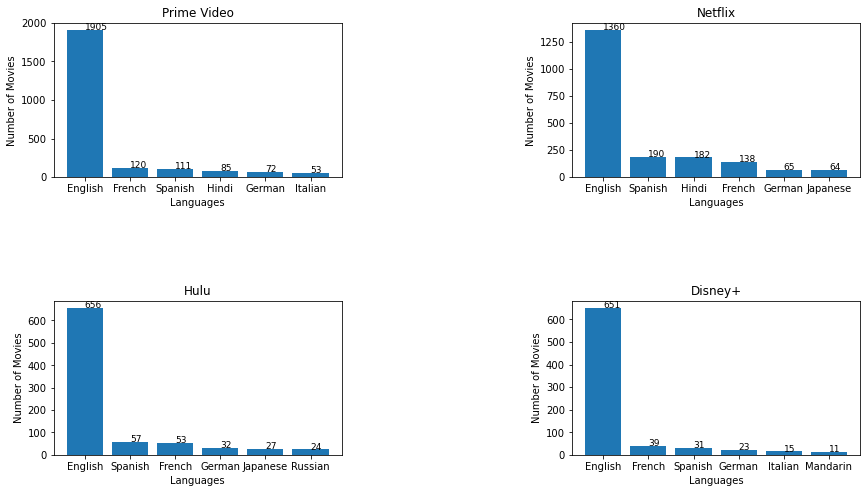

In [224]:
df_languages = pd.DataFrame(dict_language_count)
df_languages['Platforms']=platform
for index,row in df_languages.iterrows():
    if row['Platforms']=='Prime Video':
        df_prime=row.drop(index=['Platforms'])
        df_prime=df_prime.sort_values(ascending=False).head(6).transpose()
    elif row['Platforms']=='Netflix':
        df_netflix=row.drop(index=['Platforms'])
        df_netflix=df_netflix.sort_values(ascending=False).head(6).transpose()
    elif row['Platforms']=='Hulu':
        df_hulu=row.drop(index=['Platforms'])
        df_hulu=df_hulu.sort_values(ascending=False).head(6).transpose()
    else:
        df_disney=row.drop(index=['Platforms'])
        df_disney=df_disney.sort_values(ascending=False).head(6).transpose()
        
    
plt.subplot(2, 2, 1)        
plt.bar(df_prime.index,df_prime, tick_label = list(df_prime.index), width = 0.8)
for i,data in enumerate(df_prime):
    plt.text(x=i , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=9))
plt.xlabel("Languages")
plt.ylabel("Number of Movies")
plt.title("Prime Video")

plt.subplot(2, 2, 2)
plt.bar(df_netflix.index,df_netflix, tick_label = list(df_netflix.index),width = 0.8) 
for i,data in enumerate(df_netflix):
    plt.text(x=i , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=9))
plt.title("Netflix")
plt.xlabel("Languages")
plt.ylabel("Number of Movies")

plt.subplot(2, 2, 3)
plt.bar(df_hulu.index,df_hulu, tick_label = list(df_hulu.index), width = 0.8)
for i,data in enumerate(df_hulu):
    plt.text(x=i , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=9))
plt.title("Hulu")
plt.xlabel("Languages")
plt.ylabel("Number of Movies")

plt.subplot(2, 2, 4)
plt.bar(df_disney.index,df_disney, tick_label = list(df_disney.index),width = 0.8) 
for i,data in enumerate(df_disney):
    plt.text(x=i , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=9))
plt.title("Disney+")
plt.xlabel("Languages")
plt.ylabel("Number of Movies")
plt.subplots_adjust(bottom = 5 ,top = 6 , wspace = 0.8 ,hspace = 0.8, left=0.9, right=2.3)
plt.show()
        
        
        
        
        
        
        

In [214]:
#Availability of movies in various age groups by each streaming platform.

In [215]:
age_unique=df.Age.unique()
age_unique


array(['18+', '7+', '13+', '16+', 'all'], dtype=object)

In [216]:
dict_age={}
platform = ['Prime Video','Netflix', 'Hulu', 'Disney+']
for p in platform:
    age_count=[]
    for age in age_unique:   
        df_boolean=df.apply(lambda x : True
            if x['Age'] == age and x[p]==1  else False, axis = 1)
        age_count.append(len(df_boolean[df_boolean == True].index))
    dict_age[p]=np.array(age_count)


In [217]:
df_age = pd.DataFrame(dict_age)
df_age= df_age.T
df_age.rename(columns={0: '18+', 1: '7+',2: '13+',3: '16+',4:'all'}, inplace=True)
df_age['Platforms']=platform

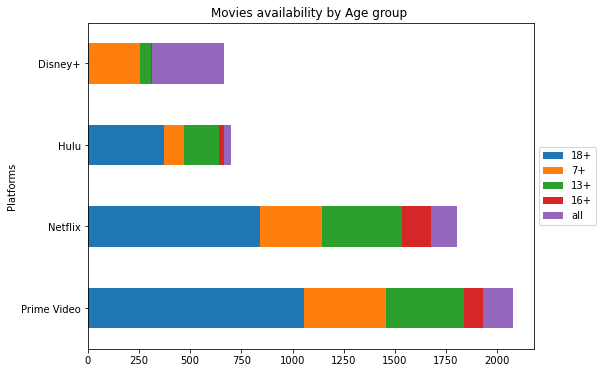

In [227]:
df_age.plot(
    x = 'Platforms',
    kind = 'barh',
    stacked = True,
    title = 'Movies availability by Age group ',
    mark_right = True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
